In [1129]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1130]:
# The code was removed by DSX for sharing.

,Unnamed: 0,Study,Country,Year,Year_Period,Month,Exercise,Measure,Amount,Combined,Month_n,Year_n,Col,Val,period_m
0,0,EFC11568,France Corporate,2017,2012,M08,Actual,Monthly Inclusion,29,EFC11568 France Corporate,8,2012,EFC11568 France Corporate,2012-08-31,8
1,1,EFC11568,France Corporate,2017,2012,M09,Actual,Monthly Inclusion,58,EFC11568 France Corporate,9,2012,EFC11568 France Corporate,2012-09-30,8
2,2,EFC11568,France Corporate,2017,2012,M10,Actual,Monthly Inclusion,35,EFC11568 France Corporate,10,2012,EFC11568 France Corporate,2012-10-31,8
3,3,EFC11568,France Corporate,2017,2012,M11,Actual,Monthly Inclusion,58,EFC11568 France Corporate,11,2012,EFC11568 France Corporate,2012-11-30,8
4,4,EFC11568,France Corporate,2017,2012,M12,Actual,Monthly Inclusion,30,EFC11568 France Corporate,12,2012,EFC11568 France Corporate,2012-12-31,8



zscore = lambda x: (x - x.mean()) / x.std()
percentage = lambda x: x / x.sum()
percentage_in = lambda x: x / x.count()
combined_10 = lambda x: x//10 * 10



### add features
##aplly count!
#df_data_pe_1['cumsum_amount'] = df_data_pe_1.groupby('Combined')['Amount'].cumsum()
df_data_pe_1['Amount'].fillna(value = 0, inplace = True)
df_data_pe_1['Period const'] = 1 
df_data_pe_1['Period Index'] = df_data_pe_1.groupby('Combined').cumcount() + 1
df_data_pe_1['cumsum_amount'] = df_data_pe_1.groupby('Combined')['Amount'].cumsum()
df_data_pe_1['z_amount'] = df_data_pe_1.groupby('Combined')['Amount'].transform(zscore)
df_data_pe_1['z_cumsum_amount'] = df_data_pe_1.groupby('Combined')['cumsum_amount'].transform(zscore)
df_data_pe_1['Period max'] = df_data_pe_1.groupby('Combined')['Period const'].transform(sum)
df_data_pe_1['Amount max'] = df_data_pe_1.groupby('Combined')['Amount'].transform(sum)
df_data_pe_1['Period max'].head()

In [1131]:
print df_data_pe.sort_values(['Combined', 'Val' ],ascending=True).head()

      Unnamed: 0 Study Country  Year  Year_Period Month Exercise Measure  \
7800        7800   NaN     NaN   NaN          NaN   NaN      NaN     NaN   
7801        7801   NaN     NaN   NaN          NaN   NaN      NaN     NaN   
7802        7802   NaN     NaN   NaN          NaN   NaN      NaN     NaN   
7803        7803   NaN     NaN   NaN          NaN   NaN      NaN     NaN   
7804        7804   NaN     NaN   NaN          NaN   NaN      NaN     NaN   

      Amount             Combined  Month_n  Year_n                  Col  \
7800     NaN  ACT12339 France CSU        3    2013  ACT12339 France CSU   
7801     NaN  ACT12339 France CSU        4    2013  ACT12339 France CSU   
7802     NaN  ACT12339 France CSU        5    2013  ACT12339 France CSU   
7803     NaN  ACT12339 France CSU        6    2013  ACT12339 France CSU   
7804     NaN  ACT12339 France CSU        7    2013  ACT12339 France CSU   

             Val  period_m  
7800  2013-03-31         7  
7801  2013-04-30         7  
7802 

In [1132]:
df_data_pe['Period Index'] = df_data_pe.sort_values(by=['Combined', 'Val']).groupby('Combined').cumcount() + 1
df_data_pe['Amount'].fillna(0, inplace = True)
df_data_pe['Amount max'] = df_data_pe.groupby('Combined')['Amount'].transform(sum)
df_data_pe.head()

,Unnamed: 0,Study,Country,Year,Year_Period,Month,Exercise,Measure,Amount,Combined,Month_n,Year_n,Col,Val,period_m,Period Index,Amount max
0,0,EFC11568,France Corporate,2017,2012,M08,Actual,Monthly Inclusion,29,EFC11568 France Corporate,8,2012,EFC11568 France Corporate,2012-08-31,8,2,316
1,1,EFC11568,France Corporate,2017,2012,M09,Actual,Monthly Inclusion,58,EFC11568 France Corporate,9,2012,EFC11568 France Corporate,2012-09-30,8,3,316
2,2,EFC11568,France Corporate,2017,2012,M10,Actual,Monthly Inclusion,35,EFC11568 France Corporate,10,2012,EFC11568 France Corporate,2012-10-31,8,4,316
3,3,EFC11568,France Corporate,2017,2012,M11,Actual,Monthly Inclusion,58,EFC11568 France Corporate,11,2012,EFC11568 France Corporate,2012-11-30,8,5,316
4,4,EFC11568,France Corporate,2017,2012,M12,Actual,Monthly Inclusion,30,EFC11568 France Corporate,12,2012,EFC11568 France Corporate,2012-12-31,8,6,316


In [1133]:
#df_data_pe['period_m'] = df_data_pe['period_m'] + 1

In [1134]:
def get_10(row):
    
    if float(row['Period Index']) / float(row['period_m']) <= 0.25:
        return 1
    elif  float(row['Period Index']) / float(row['period_m']) <= 0.5:
        return 2
    elif  float(row['Period Index']) / float(row['period_m']) <= 0.75:
        return 3
    else:
        return 4

df_data_pe['get_10'] = df_data_pe.apply(get_10, axis=1)

def get_per(row):
    try:
        z = float(row['Amount']) / float(row['Amount max'])
    except ZeroDivisionError:
        z = 0
    return z

df_data_pe['get_per'] = df_data_pe.apply(get_per, axis=1)
df_data_pe['cumsum_get_per'] = df_data_pe.groupby('Combined')['get_per'].cumsum()


#df_data_pe_1_comp = df_data_pe_1.groupby('Combined')['Amount', 'Period const'].apply(combined_10)

In [1135]:
df_data_pe[['Combined','get_10','Period Index', 'period_m', 'Val', 'Amount', 'Amount max']].head(20)

,Combined,get_10,Period Index,period_m,Val,Amount,Amount max
0,EFC11568 France Corporate,1,2,8,2012-08-31,29,316
1,EFC11568 France Corporate,2,3,8,2012-09-30,58,316
2,EFC11568 France Corporate,2,4,8,2012-10-31,35,316
3,EFC11568 France Corporate,3,5,8,2012-11-30,58,316
4,EFC11568 France Corporate,3,6,8,2012-12-31,30,316
5,EFC11568 France Corporate,4,7,8,2013-01-31,40,316
6,EFC11568 France Corporate,4,8,8,2013-02-28,57,316
7,EFC11568 France Corporate,4,9,8,2013-03-31,9,316
8,EFC11569 France Corporate,1,1,10,2012-08-31,4,720
9,EFC11569 France Corporate,1,2,10,2012-09-30,11,720


In [1136]:
df_pivot = pd.pivot_table(df_data_pe.dropna(), values=['get_per'], index=['get_10'], columns=['Combined'], aggfunc=np.sum)
df_pivot.fillna(value = 0, inplace = True)
df_pivot= df_pivot.cumsum()
#print df_pivot.head()
df_pivot.columns.droplevel(level=0)

Index([u'ACT12339 France CSU', u'ACT12340 Belgium', u'ACT12340 Spain',
       u'ACT12340 USA CSU', u'ACT12688 USA Corporate', u'ACT12781 Japan',
       u'ACT13480 Czech Republic CSU', u'ACT13480 France CSU',
       u'ACT13480 Italy CSU', u'ACT13480 Spain',
       ...
       u'TED12318 USA CSU', u'TED12337 Japan', u'TED12337 Korea',
       u'TED12414 Belgium', u'TED12414 France CSU', u'TED12414 USA CSU',
       u'TED12471 USA CSU', u'TED12689 USA CSU', u'TED12863 Belgium',
       u'TES13519 Belgium'],
      dtype='object', name=u'Combined', length=688)

In [1137]:
#df_pivot.corr()

In [1138]:
#sns.heatmap(df_pivot.corr())

In [1139]:
#g = sns.clustermap(df_pivot.T, col_cluster=False)

In [1140]:
#g.dendrogram_row.reordered_ind
#pd.Series(g.dendrogram_row.reordered_ind).values

In [1141]:
df_pivot_T = df_pivot.T
#df_pivot_T.rowa = df_pivot_T.rows.droplevel()
df_pivot_T.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 688 entries, (get_per, ACT12339 France CSU) to (get_per, TES13519 Belgium)
Data columns (total 4 columns):
1    688 non-null float64
2    688 non-null float64
3    688 non-null float64
4    688 non-null float64
dtypes: float64(4)
memory usage: 26.9+ KB


In [1142]:
#df_pivot_T['Cluster'] = pd.Series(g.dendrogram_row.reordered_ind).values

In [1143]:
df_pivot_T.head(10)

get_10                                      1         2         3  4
        Combined                                                    
get_per ACT12339 France CSU          0.000000  0.000000  0.000000  1
        ACT12340 Belgium             0.000000  0.000000  0.588235  1
        ACT12340 Spain               0.222222  0.555556  0.722222  1
        ACT12340 USA CSU             0.000000  0.066667  0.200000  1
        ACT12688 USA Corporate       0.035714  0.178571  0.571429  1
        ACT12781 Japan               0.250000  0.437500  0.656250  1
        ACT13480 Czech Republic CSU  0.312500  0.500000  0.750000  1
        ACT13480 France CSU          0.666667  1.000000  1.000000  1
        ACT13480 Italy CSU           0.600000  0.800000  0.800000  1
        ACT13480 Spain               0.571429  0.857143  0.857143  1

In [1144]:
#df_pivot_T[0] = 0
df_pivot_T.T.sort_index

<bound method DataFrame.sort_index of                      get_per                                                   \
Combined ACT12339 France CSU ACT12340 Belgium ACT12340 Spain ACT12340 USA CSU   
get_10                                                                          
1                          0         0.000000       0.222222         0.000000   
2                          0         0.000000       0.555556         0.066667   
3                          0         0.588235       0.722222         0.200000   
4                          1         1.000000       1.000000         1.000000   

                                                                            \
Combined ACT12688 USA Corporate ACT12781 Japan ACT13480 Czech Republic CSU   
get_10                                                                       
1                      0.035714        0.25000                      0.3125   
2                      0.178571        0.43750                      0.5000   
3   

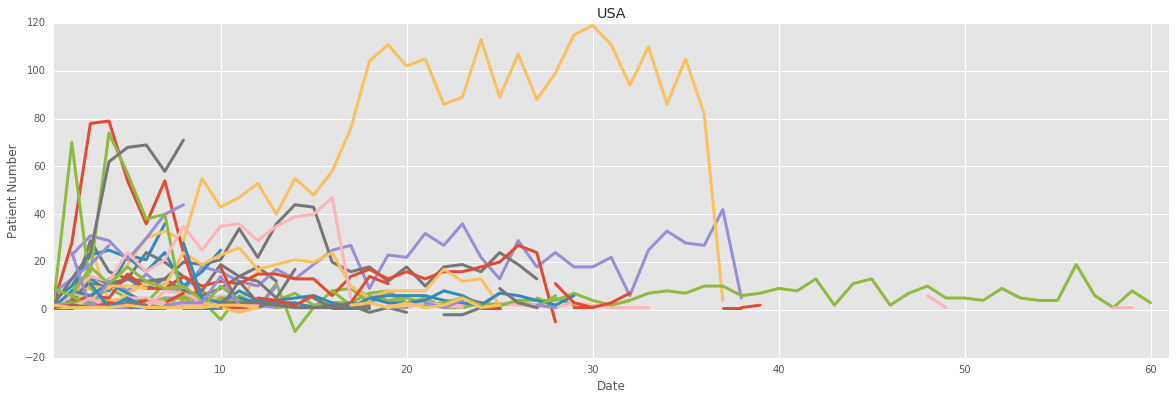

In [1145]:

#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

#df_data_pe.where(df_data_pe['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)
df_data_pe.where(df_data_pe['Combined'].str.contains('USA CSU') ).dropna().pivot(index='Period Index', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)
ax.legend().set_visible(False)

ax.set_title('USA')
#ax.set_xlim([0, 50])
ax.set_xlabel('Date')
ax.set_ylabel('Patient Number');



In [1146]:
df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').cumsum().fillna(0)

Combined,DRI11772 Australia,DRI12544 Australia,EFC11319 Australia,EFC11570 Australia,EFC11784 Australia,EFC11785 Australia,EFC12404 Australia,EFC12405 Australia,EFC12703 Australia,EFC12812 Australia,EFC13579 Australia,EFC13786 Australia,EFC13799 Australia,EFC6058 Australia,LTS11210 Australia
Period Index,,,,,,,,,,,,,,,
1,0.000000,0.10,0.000000,0.009259,0.058252,0.000000,1,0,0.000000,1,0.038462,0.916667,0.0,0.000000,0.038462
2,0.096774,0.20,0.000000,0.032407,0.067961,0.000000,0,0,0.263158,0,0.000000,1.000000,0.0,0.111111,0.115385
3,0.161290,0.25,0.058824,0.050926,0.106796,0.058333,0,0,0.315789,0,0.115385,0.000000,0.0,0.000000,0.000000
4,0.000000,0.30,0.000000,0.000000,0.126214,0.116667,0,0,0.000000,0,0.153846,0.000000,0.0,0.000000,0.230769
5,0.225806,0.00,0.000000,0.074074,0.000000,0.141667,0,1,0.526316,0,0.230769,0.000000,0.0,0.000000,0.307692
6,0.451613,0.45,0.117647,0.083333,0.213592,0.000000,0,0,0.684211,0,0.307692,0.000000,0.0,0.222222,0.000000
7,0.806452,0.65,0.000000,0.111111,0.000000,0.200000,0,0,0.842105,0,0.346154,0.000000,0.0,0.000000,0.000000
8,1.000000,0.00,0.000000,0.134259,0.310680,0.000000,0,0,1.000000,0,0.000000,0.000000,0.5,0.000000,0.346154
9,0.000000,0.75,0.000000,0.157407,0.359223,0.358333,0,0,0.000000,0,0.423077,0.000000,1.0,0.000000,0.000000


In [1147]:
df_data_pe.head()

,Unnamed: 0,Study,Country,Year,Year_Period,Month,Exercise,Measure,Amount,Combined,Month_n,Year_n,Col,Val,period_m,Period Index,Amount max,get_10,get_per,cumsum_get_per
0,0,EFC11568,France Corporate,2017,2012,M08,Actual,Monthly Inclusion,29,EFC11568 France Corporate,8,2012,EFC11568 France Corporate,2012-08-31,8,2,316,1,0.091772,0.091772
1,1,EFC11568,France Corporate,2017,2012,M09,Actual,Monthly Inclusion,58,EFC11568 France Corporate,9,2012,EFC11568 France Corporate,2012-09-30,8,3,316,2,0.183544,0.275316
2,2,EFC11568,France Corporate,2017,2012,M10,Actual,Monthly Inclusion,35,EFC11568 France Corporate,10,2012,EFC11568 France Corporate,2012-10-31,8,4,316,2,0.110759,0.386076
3,3,EFC11568,France Corporate,2017,2012,M11,Actual,Monthly Inclusion,58,EFC11568 France Corporate,11,2012,EFC11568 France Corporate,2012-11-30,8,5,316,3,0.183544,0.569620
4,4,EFC11568,France Corporate,2017,2012,M12,Actual,Monthly Inclusion,30,EFC11568 France Corporate,12,2012,EFC11568 France Corporate,2012-12-31,8,6,316,3,0.094937,0.664557


In [1148]:

#plt.style.use('seaborn-notebook')
#plt.style.use('ggplot')
#fig, ax = plt.subplots(nrows=2, ncols=1)
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

#df_data_pe.where(df_data_pe['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)
#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot(ax=ax, figsize=(10, 3) , linewidth=3)
#df_pivot.plot(ax=ax, figsize=(20, 6))
#ax.legend().set_visible(False)

#ax.set_title('Australia')
##ax.set_xlim([0, 50])
#ax.set_xlabel('Date')
#ax.set_ylabel('Patient Number');



In [1149]:
df_data_pe.where(df_data_pe['Combined'].str.contains('Australia') ).dropna().pivot(index='Val', columns='Combined', values='Amount').head()

Combined,DRI11772 Australia,DRI12544 Australia,EFC11319 Australia,EFC11570 Australia,EFC11784 Australia,EFC11785 Australia,EFC12404 Australia,EFC12405 Australia,EFC12703 Australia,EFC12812 Australia,EFC13579 Australia,EFC13786 Australia,EFC13799 Australia,EFC6058 Australia,LTS11210 Australia
Val,,,,,,,,,,,,,,,
2010-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2010-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2010-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2011-03-31,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [1150]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return(colored_labels)

In [1151]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

##https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1152]:
#df_pivot.T.plot(x=[1], y=[2], kind='scatter')
#plt.scatter(df_pivot['1'], df_pivot['2'])
X = df_pivot.T
print X.shape  
Z = sch.linkage(X, method='ward')



(688, 4)


In [1153]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.59513095374071578

In [1154]:
Z[300:310]
#resulting array has the format [idx1, idx2, dist, sample_count].

array([[  1.37000000e+02,   8.31000000e+02,   3.82332602e-02,
          3.00000000e+00],
       [  8.10000000e+01,   8.55000000e+02,   3.82931368e-02,
          3.00000000e+00],
       [  7.00000000e+01,   6.15000000e+02,   3.86761538e-02,
          2.00000000e+00],
       [  8.62000000e+02,   8.73000000e+02,   3.87332896e-02,
          4.00000000e+00],
       [  1.33000000e+02,   3.32000000e+02,   3.87686511e-02,
          2.00000000e+00],
       [  1.82000000e+02,   9.32000000e+02,   3.87995909e-02,
          5.00000000e+00],
       [  1.09000000e+02,   7.34000000e+02,   3.88807896e-02,
          3.00000000e+00],
       [  2.00000000e+00,   8.29000000e+02,   3.90563823e-02,
          3.00000000e+00],
       [  8.40000000e+01,   1.71000000e+02,   3.91212335e-02,
          2.00000000e+00],
       [  4.04000000e+02,   8.70000000e+02,   3.92110028e-02,
          3.00000000e+00]])

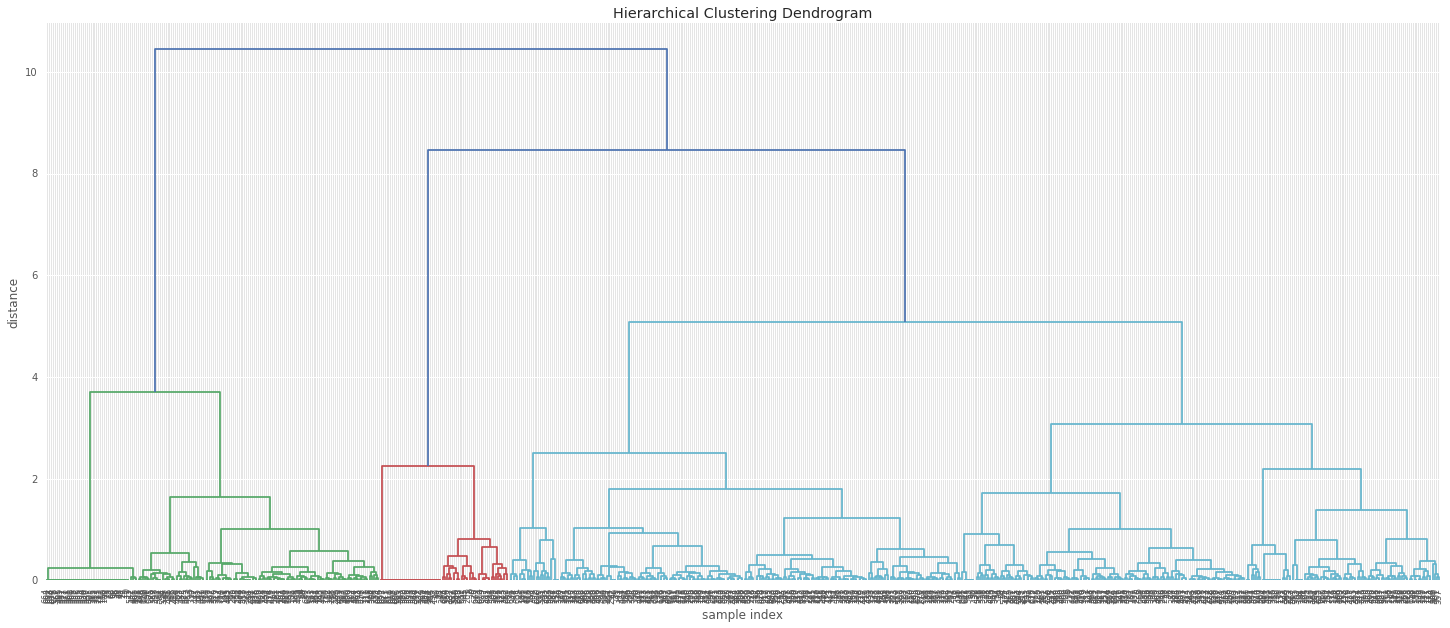

In [1155]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
 #   above_threshold_color='#bcbddc'
)
plt.show()

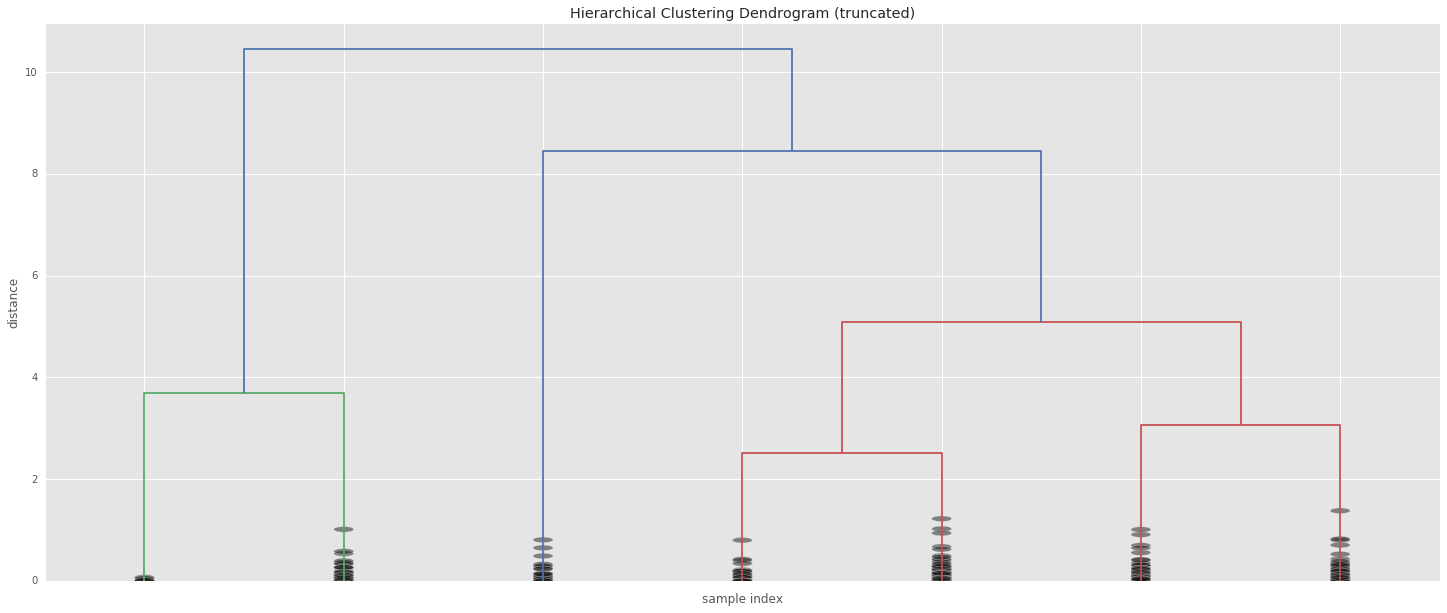

In [1156]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=7,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [1157]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('cluster size')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

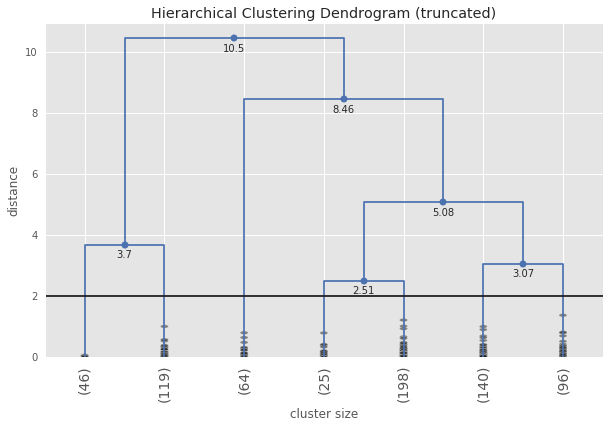

In [1158]:
plt.figure(figsize=(10, 6))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=7,
    leaf_rotation=90.,
    leaf_font_size=14.,
    show_contracted=True,
    annotate_above=2,  # useful in small plots so annotations don't overlap
    max_d=2,  # plot a horizontal cut-off line
  #  orientation='left'
)


plt.show()

In [1159]:
ind = sch.fcluster(Z, 2, 'distance')
print ind

[1 5 7 2 2 7 7 4 4 4 2 6 6 1 3 1 6 6 9 6 6 7 1 2 7 5 4 7 7 7 6 4 3 5 7 6 2
 7 7 6 3 6 6 1 9 4 2 9 1 9 7 5 7 6 7 2 1 7 1 6 1 2 1 2 6 2 8 2 2 6 7 2 5 1
 2 2 7 2 1 6 2 6 2 6 6 6 2 2 2 6 2 2 7 7 6 6 6 6 2 7 1 9 2 6 9 2 5 2 2 6 1
 2 2 4 9 9 9 9 9 9 9 9 8 4 7 7 9 9 2 2 6 8 6 4 9 5 6 6 6 7 6 2 7 7 6 2 6 6
 6 6 6 7 7 6 9 9 6 2 7 6 6 2 6 7 2 6 6 7 7 9 6 6 3 5 6 7 6 6 6 2 5 1 6 6 6
 7 6 7 2 6 6 6 7 2 7 6 9 2 6 6 6 6 2 6 2 6 7 6 7 6 6 6 7 6 7 6 6 6 7 2 7 7
 7 6 6 6 6 6 6 2 6 6 7 2 2 1 8 6 2 6 8 7 6 7 7 6 7 6 9 4 7 7 7 9 7 7 7 7 6
 7 9 4 7 7 9 9 9 9 9 7 9 7 6 7 7 6 7 9 7 7 7 7 4 9 6 7 7 6 2 8 2 6 2 4 8 3
 2 6 6 2 6 9 6 6 7 6 6 7 6 6 6 6 6 1 2 6 6 2 9 6 6 2 6 6 2 6 2 6 6 6 2 2 4
 6 6 2 9 2 6 7 6 6 6 6 5 6 6 6 7 7 6 6 9 7 6 7 6 7 7 7 7 7 4 4 2 6 6 6 3 7
 2 3 7 6 7 4 8 6 6 6 8 6 6 1 8 1 7 2 6 2 9 5 2 2 5 7 2 6 6 6 2 2 6 6 2 1 6
 2 2 2 7 6 2 6 7 6 2 6 7 8 7 6 7 7 6 2 2 9 6 7 6 6 7 7 7 7 7 1 2 7 6 2 2 2
 3 4 1 2 2 6 1 1 2 2 1 1 1 1 1 2 1 1 7 2 6 2 1 6 1 2 6 1 6 2 2 2 2 1 2 2 2
 1 2 8 2 1 2 2 6 6 2 1 5 

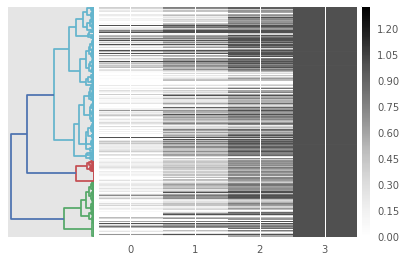

In [1160]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
#x = scipy.rand(40)
#D = scipy.zeros([40,40])
#x = df_pivot.T
#for i in range(40):
 #   for j in range(40):
  #      D[i,j] = abs(x[i] - x[j])
D = df_pivot.T
# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='ward')
Z = sch.dendrogram(Y, orientation='left')

axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
#D = D[index,:]
#D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks(range(4))
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()
#axmatrix.set_xticklabels(idx1, minor=False)
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)


#fig.rcParams["figure.figsize"] = (20,3)

# Display and save figure.
fig.show()
#fig.savefig('dendrogram.png')


In [1161]:
ind2 = sch.fcluster(Y, 7, 'distance')
print ind2

[1 3 3 1 1 3 3 2 2 2 1 3 3 1 2 1 3 3 3 3 3 3 1 1 3 3 2 3 3 3 3 2 2 3 3 3 1
 3 3 3 2 3 3 1 3 2 1 3 1 3 3 3 3 3 3 1 1 3 1 3 1 1 1 1 3 1 3 1 1 3 3 1 3 1
 1 1 3 1 1 3 1 3 1 3 3 3 1 1 1 3 1 1 3 3 3 3 3 3 1 3 1 3 1 3 3 1 3 1 1 3 1
 1 1 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 1 1 3 3 3 2 3 3 3 3 3 3 3 1 3 3 3 1 3 3
 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 3 3 3 3 3 3 3 2 3 3 3 3 3 3 1 3 1 3 3 3
 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3
 3 3 3 3 3 3 3 1 3 3 3 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 1 3 1 3 1 2 3 2
 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 1 3 3 3 1 3 3 1 3 1 3 3 3 1 1 2
 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 3 3 3 2 3
 1 2 3 3 3 2 3 3 3 3 3 3 3 1 3 1 3 1 3 1 3 3 1 1 3 3 1 3 3 3 1 1 3 3 1 1 3
 1 1 1 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 1 1 3 3 1 1 1
 2 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 3 1 1 3 1 3 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 3 3 1 1 3 

In [1162]:
ind = sch.fcluster(Y, 2.3, 'distance')
print ind

[1 4 6 2 2 6 6 3 3 3 2 5 5 1 3 1 5 5 7 5 5 6 1 2 6 4 3 6 6 6 5 3 3 4 6 5 2
 6 6 5 3 5 5 1 7 3 2 7 1 7 6 4 6 5 6 2 1 6 1 5 1 2 1 2 5 2 7 2 2 5 6 2 4 1
 2 2 6 2 1 5 2 5 2 5 5 5 2 2 2 5 2 2 6 6 5 5 5 5 2 6 1 7 2 5 7 2 4 2 2 5 1
 2 2 3 7 7 7 7 7 7 7 7 7 3 6 6 7 7 2 2 5 7 5 3 7 4 5 5 5 6 5 2 6 6 5 2 5 5
 5 5 5 6 6 5 7 7 5 2 6 5 5 2 5 6 2 5 5 6 6 7 5 5 3 4 5 6 5 5 5 2 4 1 5 5 5
 6 5 6 2 5 5 5 6 2 6 5 7 2 5 5 5 5 2 5 2 5 6 5 6 5 5 5 6 5 6 5 5 5 6 2 6 6
 6 5 5 5 5 5 5 2 5 5 6 2 2 1 7 5 2 5 7 6 5 6 6 5 6 5 7 3 6 6 6 7 6 6 6 6 5
 6 7 3 6 6 7 7 7 7 7 6 7 6 5 6 6 5 6 7 6 6 6 6 3 7 5 6 6 5 2 7 2 5 2 3 7 3
 2 5 5 2 5 7 5 5 6 5 5 6 5 5 5 5 5 1 2 5 5 2 7 5 5 2 5 5 2 5 2 5 5 5 2 2 3
 5 5 2 7 2 5 6 5 5 5 5 4 5 5 5 6 6 5 5 7 6 5 6 5 6 6 6 6 6 3 3 2 5 5 5 3 6
 2 3 6 5 6 3 7 5 5 5 7 5 5 1 7 1 6 2 5 2 7 4 2 2 4 6 2 5 5 5 2 2 5 5 2 1 5
 2 2 2 6 5 2 5 6 5 2 5 6 7 6 5 6 6 5 2 2 7 5 6 5 5 6 6 6 6 6 1 2 6 5 2 2 2
 3 3 1 2 2 5 1 1 2 2 1 1 1 1 1 2 1 1 6 2 5 2 1 5 1 2 5 1 5 2 2 2 2 1 2 2 2
 1 2 7 2 1 2 2 5 5 2 1 4 

In [1163]:
df_pivot_T['Cluster2'] = pd.Series(ind).values
df_pivot_T['Cluster3'] = pd.Series(ind2).values


In [1164]:
df_pivot_T

get_10                                      1         2         3  4  \
        Combined                                                       
get_per ACT12339 France CSU          0.000000  0.000000  0.000000  1   
        ACT12340 Belgium             0.000000  0.000000  0.588235  1   
        ACT12340 Spain               0.222222  0.555556  0.722222  1   
        ACT12340 USA CSU             0.000000  0.066667  0.200000  1   
        ACT12688 USA Corporate       0.035714  0.178571  0.571429  1   
        ACT12781 Japan               0.250000  0.437500  0.656250  1   
        ACT13480 Czech Republic CSU  0.312500  0.500000  0.750000  1   
        ACT13480 France CSU          0.666667  1.000000  1.000000  1   
        ACT13480 Italy CSU           0.600000  0.800000  0.800000  1   
        ACT13480 Spain               0.571429  0.857143  0.857143  1   
        ACT13480 Turkey              0.062500  0.250000  0.375000  1   
        ACT13480 USA CSU             0.100000  0.400000  0.500000  1   
        ACT13710 Japan               0.142857  0.285714  0.785714  1   
        ACT13739 France CSU          0.000000  0.000000  0.000000  1   
        ACT13739 Poland              1.000000  1.000000  1.000000  1   
        ACT13739 Russia CSU          0.000000  0.000000  0.000000  1   
        ACT13739 UK CSU              0.250000  0.250000  0.500000  1   
        ACT13739 USA CSU             0.250000  0.250000  0.500000  1   
        ARD10248 Belgium             0.400000  0.800000  0.800000  1   
        ARD10248 Czech Republic CSU  0.100000  0.500000  0.800000  1   
        ARD10248 Italy CSU           0.166667  0.416667  0.666667  1   
        ARD10248 Poland              0.500000  0.750000  0.750000  1   
        ARD10248 Turkey              0.000000  0.000000  0.000000  1   
        ARD10248 UK CSU              0.000000  0.000000  0.200000  1   
        ARD10248 USA CSU             0.333333  0.333333  0.666667  1   
        ARD11936 USA CSU             0.000000  0.000000  0.870968  1   
        ARD12130 Belgium             0.588235  0.882353  0.882353  1   
        ARD12130 France CSU          0.333333  0.533333  0.600000  1   
        ARD12130 Germany CSU         0.538462  0.692308  0.692308  1   
        ARD12130 Netherlands         0.384615  0.692308  0.692308  1   
...                                       ...       ...       ... ..   
        TCD13388 France Corporate    0.142857  0.571429  1.000000  1   
        TCD13388 Netherlands         0.200000  0.333333  0.600000  1   
        TCD14079 USA CSU             0.117647  0.588235  1.235294  1   
        TDR12857 Belgium             0.500000  0.500000  0.500000  1   
        TDR12857 Germany CSU         0.000000  0.000000  0.000000  1   
        TDR12857 USA CSU             0.300000  0.600000  0.900000  1   
        TDR14323 USA CSU             0.000000  0.000000  0.000000  1   
        TED10499 France CSU          0.000000  0.000000  0.600000  1   
        TED10499 France Corporate    0.000000  0.181818  1.000000  1   
        TED10499 Spain               0.195122  0.609756  0.780488  1   
        TED10499 USA CSU             0.242424  0.454545  0.666667  1   
        TED10893 France CSU          0.666667  0.750000  0.916667  1   
        TED11449 France CSU          0.206897  0.413793  0.620690  1   
        TED11449 France Corporate    0.200000  0.466667  0.666667  1   
        TED11449 Italy CSU           0.343750  0.531250  0.843750  1   
        TED11449 Spain               0.166667  1.000000  1.000000  1   
        TED11746 USA CSU             0.103448  0.206897  0.413793  1   
        TED12318 France CSU          0.555556  0.888889  0.888889  1   
        TED12318 France Corporate    0.000000  0.142857  0.857143  1   
        TED12318 Netherlands         0.340426  0.723404  0.936170  1   
        TED12318 USA CSU             0.600000  0.950000  1.000000  1   
        TED12337 Japan               0.120000  0.360000  0.800000  1   
        TED12337 Korea               0.3

In [1165]:
df_pivot_T[0] = 0
df_pivot_plot = df_pivot_T[[0,1,2,3,4]].copy()
df_pivot_plot.index = df_pivot_plot.index.droplevel(level=0)

In [1166]:
df_pivot_plot.head()

get_10,0,1,2,3,4
Combined,,,,,
ACT12339 France CSU,0,0.000000,0.000000,0.000000,1
ACT12340 Belgium,0,0.000000,0.000000,0.588235,1
ACT12340 Spain,0,0.222222,0.555556,0.722222,1
ACT12340 USA CSU,0,0.000000,0.066667,0.200000,1
ACT12688 USA Corporate,0,0.035714,0.178571,0.571429,1


In [1167]:
#df_pivot_plot['Combined'] = df_pivot_plot.index
df_pivot_plot.T.columns

Index([u'ACT12339 France CSU', u'ACT12340 Belgium', u'ACT12340 Spain',
       u'ACT12340 USA CSU', u'ACT12688 USA Corporate', u'ACT12781 Japan',
       u'ACT13480 Czech Republic CSU', u'ACT13480 France CSU',
       u'ACT13480 Italy CSU', u'ACT13480 Spain',
       ...
       u'TED12318 USA CSU', u'TED12337 Japan', u'TED12337 Korea',
       u'TED12414 Belgium', u'TED12414 France CSU', u'TED12414 USA CSU',
       u'TED12471 USA CSU', u'TED12689 USA CSU', u'TED12863 Belgium',
       u'TES13519 Belgium'],
      dtype='object', name=u'Combined', length=688)

In [1168]:
au_col_filter =[]
for x in df_pivot_plot.T.columns:
    if 'Australia' in x:
        au_col_filter.append(x)
    

In [1169]:
np.array(au_col_filter)

array(['DRI11772 Australia', 'DRI12544 Australia', 'EFC11319 Australia',
       'EFC11570 Australia', 'EFC11784 Australia', 'EFC11785 Australia',
       'EFC12404 Australia', 'EFC12405 Australia', 'EFC12703 Australia',
       'EFC12812 Australia', 'EFC13579 Australia', 'EFC13786 Australia',
       'EFC13799 Australia', 'EFC6058 Australia', 'LTS11210 Australia'],
      dtype='|S18')

In [1170]:
#filter_col = [col for x in df_pivot_plot.T.columns if 'Australia' in df_pivot_plot.T.columns]
df_pivot_plot.loc[au_col_filter].T
#[np.array(au_col_filter)]

Combined,DRI11772 Australia,DRI12544 Australia,EFC11319 Australia,EFC11570 Australia,EFC11784 Australia,EFC11785 Australia,EFC12404 Australia,EFC12405 Australia,EFC12703 Australia,EFC12812 Australia,EFC13579 Australia,EFC13786 Australia,EFC13799 Australia,EFC6058 Australia,LTS11210 Australia
get_10,,,,,,,,,,,,,,,
0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0,0.000000,0,0,0.000000,0.000000
1,0.000000,0.20,0.117647,0.134259,0.126214,0.200000,1,0,0.263158,1,0.115385,0,0,0.111111,0.538462
2,0.161290,0.30,0.294118,0.347222,0.359223,0.700000,1,0,0.315789,1,0.346154,0,0,0.222222,0.692308
3,0.225806,0.65,0.647059,0.574074,0.728155,0.958333,1,0,0.684211,1,0.538462,0,0,0.888889,0.923077
4,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1,1,1.000000,1,1.000000,1,1,1.000000,1.000000


(-0.1, 1.5)

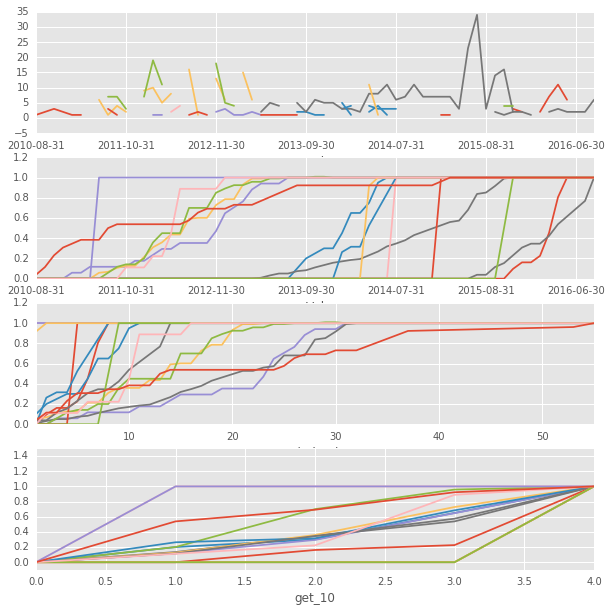

In [1171]:

#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
fig, axarr = plt.subplots(4,1)

fig.subplots_adjust(hspace=0.2)
#fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

#df_data_pe.where(df_data_pe['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)


df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='Amount').plot( ax=axarr[0], figsize=(10, 10))

df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[1], figsize=(10, 10))

df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[2], figsize=(10, 10))

df_pivot_plot.loc[au_col_filter].T.plot(ax=axarr[3], figsize=(10, 10))

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[3], figsize=(10, 7))

#df_pivot.plot(ax=ax, figsize=(20, 6))
#axarr[0].set_title('1')
axarr[0].legend().set_visible(False)
#axarr[1].set_title('2')
axarr[1].legend().set_visible(False)
#axarr[2].set_title('3')
axarr[2].legend().set_visible(False)
#axarr[3].set_title('4')
axarr[3].legend().set_visible(False)
axarr[3].set_ylim([-0.1, 1.5])
#ax.set_title('Australia')
##ax.set_xlim([0, 50])
#ax.set_xlabel('Date')
#ax.set_ylabel('Patient Number');
#axarr[3].set_xlabel('dd')



In [1172]:
pd.Series(ind).values.max()

7

In [1173]:
#df_pivot_T.index = df_pivot_T.index.droplevel(level=0)

In [1174]:
#df_pivot_T.columns = df_pivot_T.columns.d

In [1175]:
# The code was removed by DSX for sharing.

In [1176]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

In [1177]:
from ibm_botocore.client import Config
import ibm_boto3
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded')

In [1178]:
df_pivot_T.to_csv('CASA_PE_Clustered.csv',index=True)
upload_file_cos(credentials,'CASA_PE_Clustered.csv','CASA_PE_Clustered.csv')

File Uploaded


In [1179]:
df_pivot_T['0'] = 0

In [1180]:
df_pivot_T.index = df_pivot_T.index.droplevel(level=0)
#pivot[['0',1,2,3,4, 'Cluster2']]

In [1181]:
df_pivot_T

get_10,1,2,3,4,Cluster2,Cluster3,0,0
Combined,,,,,,,,
ACT12339 France CSU,0.000000,0.000000,0.000000,1,1,1,0,0
ACT12340 Belgium,0.000000,0.000000,0.588235,1,4,3,0,0
ACT12340 Spain,0.222222,0.555556,0.722222,1,6,3,0,0
ACT12340 USA CSU,0.000000,0.066667,0.200000,1,2,1,0,0
ACT12688 USA Corporate,0.035714,0.178571,0.571429,1,2,1,0,0
ACT12781 Japan,0.250000,0.437500,0.656250,1,6,3,0,0
ACT13480 Czech Republic CSU,0.312500,0.500000,0.750000,1,6,3,0,0
ACT13480 France CSU,0.666667,1.000000,1.000000,1,3,2,0,0
ACT13480 Italy CSU,0.600000,0.800000,0.800000,1,3,2,0,0


In [1183]:
import seaborn as sns
sns.set_color_codes()
#tips = sns.load_dataset("tips")
#pal = {day: "r" if day == "Sat" else "b" for day in tips.day.unique()}
#sns.boxplot(x="day", y="total_bill", data=tips, palette=pal)
#plt.style.use('seaborn-notebook')
#axarr[7].plot(df_pivot_T[['0',1,2,3,4]].T, '--', alpha=0.3)

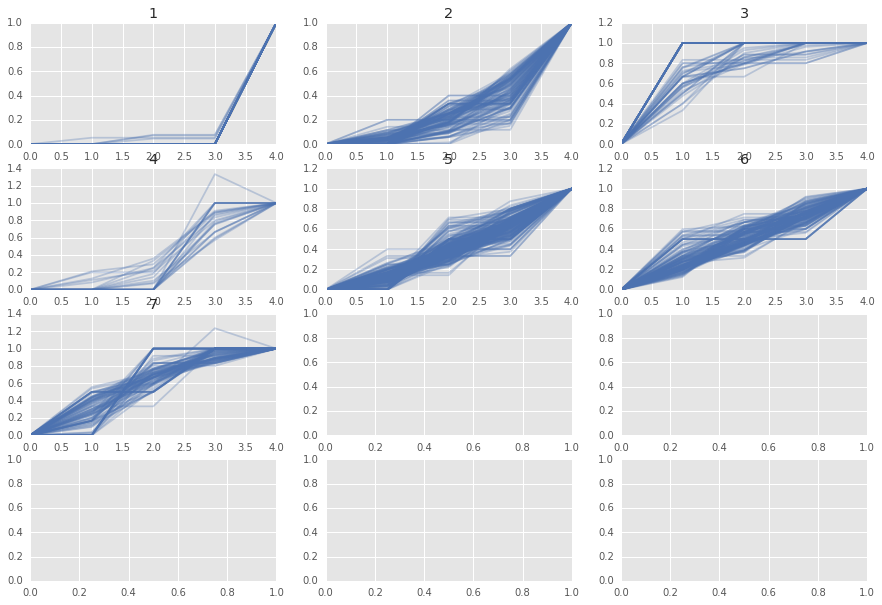

In [1192]:

plt.style.use('ggplot')
fig, axarr = plt.subplots(4,3, figsize=(15,10))

fig.subplots_adjust(hspace=0.2)
#fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

#df_data_pe.where(df_data_pe['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)

axarr[0,0].set_title('1')
axarr[0,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 1).T, 'b', alpha=0.3)
axarr[0,1].set_title('2')
axarr[0,1].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T, 'b', alpha=0.3)
axarr[0,2].set_title('3')
axarr[0,2].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 3).T, 'b', alpha=0.3)
axarr[1,0].set_title('4')
axarr[1,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 4).T, 'b', alpha=0.3)
axarr[1,1].set_title('5')
axarr[1,1].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 5).T, 'b', alpha=0.3)
axarr[1,2].set_title('6')
axarr[1,2].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 6).T, 'b', alpha=0.3)
axarr[2,0].set_title('7')
axarr[2,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 7).T, 'b', alpha=0.3)
#axarr[3,1].plot(df_pivot_T[['0',1,2,3,4]].T, '-', alpha=0.3)

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='Amount').plot( ax=axarr[0], figsize=(10, 10))

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[1], figsize=(10, 10))

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[2], figsize=(10, 10))

#df_pivot_plot.loc[au_col_filter].T.plot(ax=axarr[3], figsize=(10, 10))

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[3], figsize=(10, 7))

#df_pivot.plot(ax=ax, figsize=(20, 6))
#axarr[0].set_title('1')
#axarr[0].legend().set_visible(False)
#axarr[1].set_title('2')
#axarr[1].legend().set_visible(False)
#axarr[2].set_title('3')
#axarr[2].legend().set_visible(False)
#axarr[3].set_title('4')
#axarr[3].legend().set_visible(False)
#axarr[3].set_ylim([-0.1, 1.5])
#ax.set_title('Australia')
##ax.set_xlim([0, 50])
#ax.set_xlabel('Date')
#ax.set_ylabel('Patient Number');
#axarr[3].set_xlabel('dd')

plt.show()
plt.close(1)

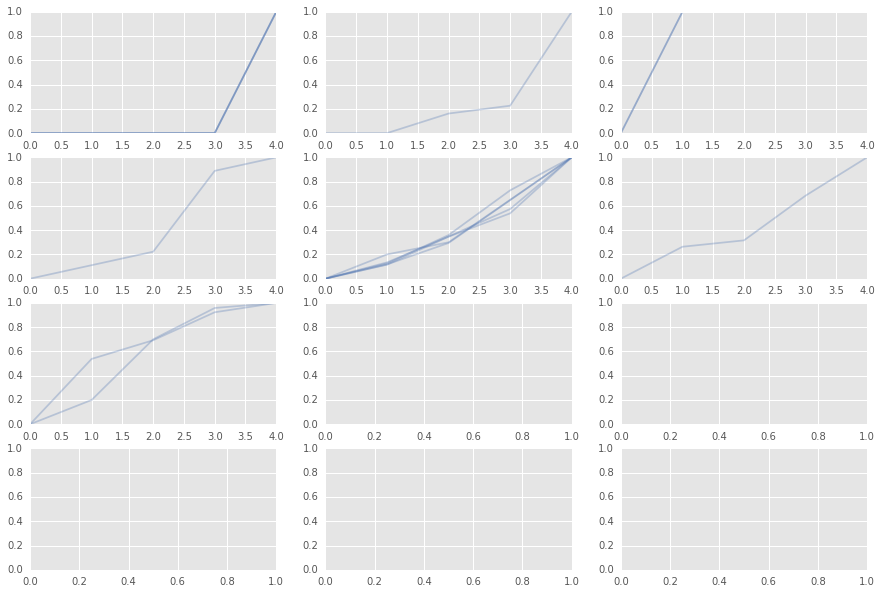

In [1184]:

plt.style.use('ggplot')
fig, axarr = plt.subplots(4,3, figsize=(15,10))

fig.subplots_adjust(hspace=0.2)
#fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

#df_data_pe.where(df_data_pe['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)

axarr[0,0].plot(df_pivot_T[['0',1,2,3,4]].loc[au_col_filter].where(df_pivot_T['Cluster2'] == 1).T, 'b', alpha=0.3)
axarr[0,1].plot(df_pivot_T[['0',1,2,3,4]].loc[au_col_filter].where(df_pivot_T['Cluster2'] == 2).T, 'b', alpha=0.3)
axarr[0,2].plot(df_pivot_T[['0',1,2,3,4]].loc[au_col_filter].where(df_pivot_T['Cluster2'] == 3).T, 'b', alpha=0.3)
axarr[1,0].plot(df_pivot_T[['0',1,2,3,4]].loc[au_col_filter].where(df_pivot_T['Cluster2'] == 4).T, 'b', alpha=0.3)
axarr[1,1].plot(df_pivot_T[['0',1,2,3,4]].loc[au_col_filter].where(df_pivot_T['Cluster2'] == 5).T, 'b', alpha=0.3)
axarr[1,2].plot(df_pivot_T[['0',1,2,3,4]].loc[au_col_filter].where(df_pivot_T['Cluster2'] == 6).T, 'b', alpha=0.3)
axarr[2,0].plot(df_pivot_T[['0',1,2,3,4]].loc[au_col_filter].where(df_pivot_T['Cluster2'] == 7).T, 'b', alpha=0.3)
#axarr[3,1].plot(df_pivot_T[['0',1,2,3,4]].T, '-', alpha=0.3)

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='Amount').plot( ax=axarr[0], figsize=(10, 10))

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[1], figsize=(10, 10))

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[2], figsize=(10, 10))

#df_pivot_plot.loc[au_col_filter].T.plot(ax=axarr[3], figsize=(10, 10))

#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[3], figsize=(10, 7))

#df_pivot.plot(ax=ax, figsize=(20, 6))
#axarr[0].set_title('1')
#axarr[0].legend().set_visible(False)
#axarr[1].set_title('2')
#axarr[1].legend().set_visible(False)
#axarr[2].set_title('3')
#axarr[2].legend().set_visible(False)
#axarr[3].set_title('4')
#axarr[3].legend().set_visible(False)
#axarr[3].set_ylim([-0.1, 1.5])
#ax.set_title('Australia')
##ax.set_xlim([0, 50])
#ax.set_xlabel('Date')
#ax.set_ylabel('Patient Number');
#axarr[3].set_xlabel('dd')

plt.show()
plt.close(1)

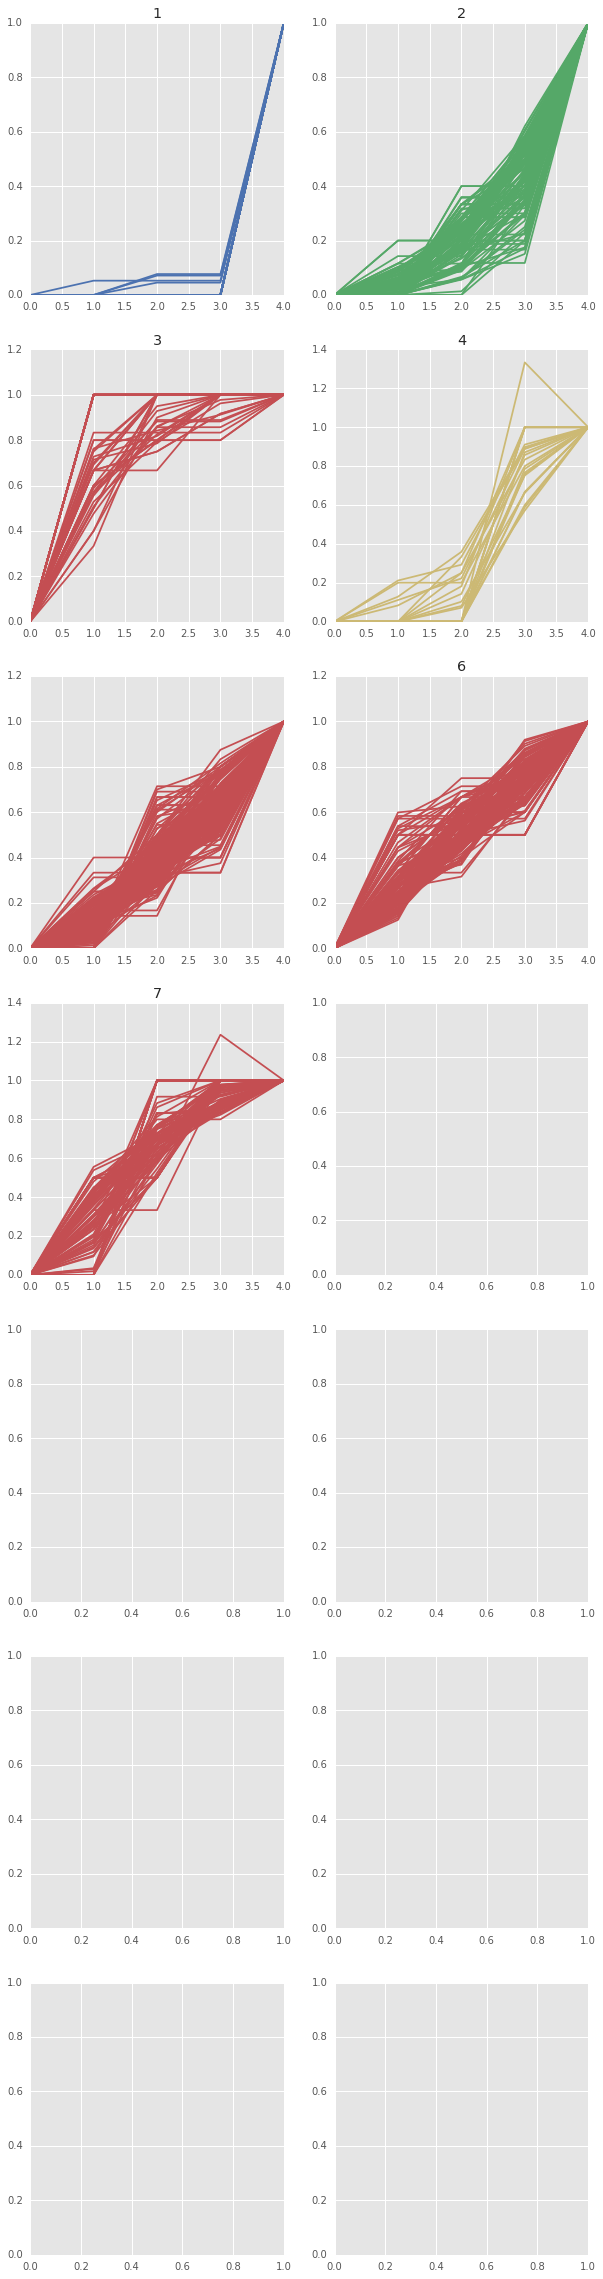

In [1185]:
#print df_pivot_T[[1,2,3,4]].T.head()
#df_pivot_T_f = df_pivot_T.where(df_pivot_T['Cluster2'] == 1)
f, axarr = plt.subplots(7,2, figsize=(10,40))

axarr[0,0].set_title('1')
axarr[0,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 1).T, 'b')

axarr[0,1].set_title('2')
axarr[0,1].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T, 'g')

axarr[1,0].set_title('3')
axarr[1,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 3).T, 'r')

axarr[1,1].set_title('4')
axarr[1,1].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 4).T, 'y')

axarr[2,1].set_title('5')
axarr[2,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 5).T, 'r')

axarr[2,1].set_title('6')
axarr[2,1].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 6).T, 'r')

axarr[3,0].set_title('7')
axarr[3,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster2'] == 7).T, 'r')

plt.show()
plt.close(1)

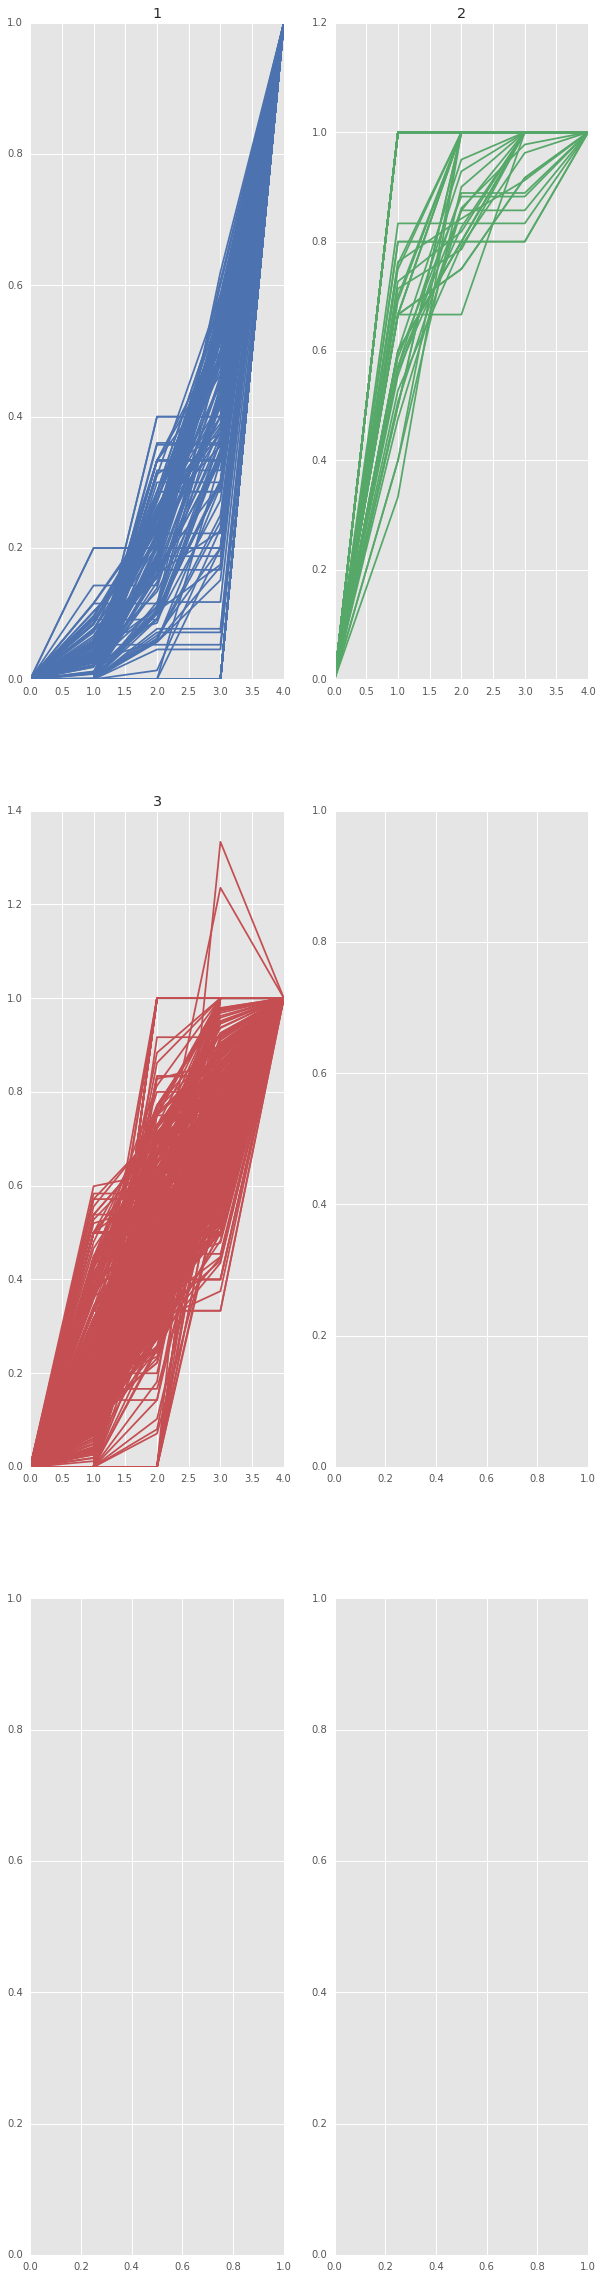

In [1186]:
#ind 2 cluster

#print df_pivot_T[[1,2,3,4]].T.head()
#df_pivot_T_f = df_pivot_T.where(df_pivot_T['Cluster2'] == 1)
f, axarr = plt.subplots(3,2, figsize=(10,40))

axarr[0,0].set_title('1')
axarr[0,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster3'] == 1).T, 'b')

axarr[0,1].set_title('2')
axarr[0,1].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster3'] == 2).T, 'g')

axarr[1,0].set_title('3')
axarr[1,0].plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Cluster3'] == 3).T, 'r')

plt.show()
plt.close(1)

In [1187]:
df_pivot_T.head()

get_10,1,2,3,4,Cluster2,Cluster3,0,0
Combined,,,,,,,,
ACT12339 France CSU,0.000000,0.000000,0.000000,1,1,1,0,0
ACT12340 Belgium,0.000000,0.000000,0.588235,1,4,3,0,0
ACT12340 Spain,0.222222,0.555556,0.722222,1,6,3,0,0
ACT12340 USA CSU,0.000000,0.066667,0.200000,1,2,1,0,0
ACT12688 USA Corporate,0.035714,0.178571,0.571429,1,2,1,0,0


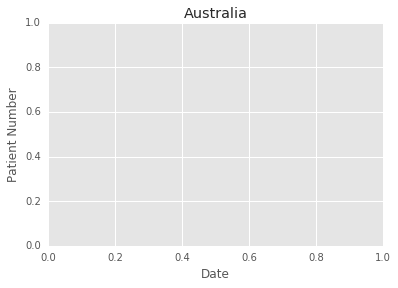

In [1188]:
df_pivot_T.index.unique()

#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)
#ax.plot(df_pivot_T[['0',1,2,3,4]].where(df_pivot_T['Combined'].str.contains('Australia')).T)
#df_data_pe.where(df_data_pe['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)
#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').cumsum().plot(ax=ax, figsize=(20, 6))
#df_pivot.plot(ax=ax, figsize=(20, 6))
#ax.plot(df_pivot.where(df_data_pe['Combined'].str.contains('Australia')).T, 'b')
#ax.legend().set_visible(False)

ax.set_title('Australia')
#ax.set_xlim([0, 50])
ax.set_xlabel('Date')
ax.set_ylabel('Patient Number');



In [1189]:
#df_data_pe_1_comp = df_data_pe_1.groupby(by=['Combined', 'get_10'], as_index=False)['Amount'].sum()

In [1190]:
#compress period to 10

#df_data_pe_1_comp = df_data_pe_1.groupby(lambda x: x//10 * 10).sum()
df_data_pe_1_comp.head(20)

NameError: name 'df_data_pe_1_comp' is not defined

In [ ]:
df_data_pe_1_comp['Period const'] = 1 
df_data_pe_1_comp['Period Index'] = df_data_pe_1_comp.groupby('Combined').cumcount() + 1
df_data_pe_1_comp['cumsum_amount'] = df_data_pe_1_comp.groupby('Combined')['Amount'].cumsum()
df_data_pe_1_comp['z_amount'] = df_data_pe_1_comp.groupby('Combined')['Amount'].transform(zscore)
df_data_pe_1_comp['z_cumsum_amount'] = df_data_pe_1_comp.groupby('Combined')['cumsum_amount'].transform(zscore)
df_data_pe_1_comp['Amount max'] = df_data_pe_1_comp.groupby('Combined')['Amount'].transform(sum)

In [ ]:
def get_per(row):
    return float(row['Amount']) / float(row['Amount max'])

df_data_pe_1_comp['get_per'] = df_data_pe_1_comp.apply(get_per, axis=1)
df_data_pe_1_comp['cumsum_get_per'] = df_data_pe_1_comp.groupby('Combined')['get_per'].cumsum()

In [ ]:
df_data_pe_1_comp.info()

In [ ]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2,3, figsize=(10,6))

axarr[0,0].set_title('Monthly Enrolment')
axarr[0,0].plot(df_data_pe_1_comp['Period Index'], df_data_pe_1_comp['Amount'],'o')
axarr[0,1].set_title('Cumul Enrolment')
axarr[0,1].plot(df_data_pe_1_comp['Period Index'], np.exp(df_data_pe_1_comp['cumsum_get_per']),'o-')
axarr[1,0].set_title('z')
axarr[1,0].plot(df_data_pe_1_comp['Period Index'], df_data_pe_1_comp['z_amount'],'o')
axarr[1,1].set_title('z')
axarr[1,1].plot(df_data_pe_1_comp['Period Index'], df_data_pe_1_comp['z_cumsum_amount'],'o-')
#hist
#sns.regplot(x, y, ax=ax1)

#axarr[0,2].hist(df_data_pe_1['Amount'])
#plt.hist()
    ## Set axis limits
#plt.xlim(0, 50)
#plt.ylim(0, 30)
plt.show()
plt.close(1) 

In [ ]:

df_pivot = pd.pivot_table(df_data_pe_comp.dropna(), values=['cumsum_get_per'], index=['Period Index'], columns=['Combined'], aggfunc=np.sum)
df_pivot.fillna(method = 'ffill', inplace = True)
df_pivot_corr = df_pivot.corr()
#print df_pivot_corr
#df_pivot = pd.pivot_table(df_data_pe_1_comp, values=['cumsum_get_per'], index=['Period Index'], columns=[['Combined']], aggfunc=np.mean, fill_value=0, dropna=False)

In [ ]:
df_pivot = pd.pivot_table(df_data_pe_comp.dropna(), values=['cumsum_get_per'], index=['Period Index'], columns=['Combined'], aggfunc=np.sum)
df_pivot.fillna(method = 'ffill', inplace = True)
df_pivot_corr = df_pivot.corr()


In [ ]:
sns.heatmap(df_pivot_corr)

plt.show()
plt.close(1)

In [ ]:
df_pivot_T[0] = 0
df_pivot_T[[0, 1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).dropna().head()

In [ ]:
#df_concat = pd.concat(df_pivot_T[1].to_frame() , df_pivot_T[2].to_frame() )
df_pivot_T['Combined'] = df_pivot_T.index
df_pivot_T = df_pivot_T.reset_index(drop=True)

In [ ]:
df_pivot_T_0 = df_pivot_T[[0, 'Combined','Cluster2']].reset_index(drop=True)
df_pivot_T_0['Period Index'] = 0
df_pivot_T_0 = df_pivot_T_0.rename(columns={0: "Amount"})

df_pivot_T_1 = df_pivot_T[[1, 'Combined','Cluster2']].reset_index(drop=True)
df_pivot_T_1['Period Index'] = 1
df_pivot_T_1 = df_pivot_T_1.rename(columns={1: "Amount"})
df_pivot_T_1['Period Index'] = 1
df_pivot_T_2 = df_pivot_T[[2, 'Combined','Cluster2']].reset_index(drop=True)
df_pivot_T_2['Period Index'] = 2
df_pivot_T_2 = df_pivot_T_2.rename(columns={2: "Amount"})
df_pivot_T_3 = df_pivot_T[[3, 'Combined','Cluster2']].reset_index(drop=True)
df_pivot_T_3['Period Index'] = 3
df_pivot_T_3 = df_pivot_T_3.rename(columns={3: "Amount"})
df_pivot_T_4 = df_pivot_T[[4, 'Combined','Cluster2']].reset_index(drop=True)
df_pivot_T_4['Period Index'] = 4
df_pivot_T_4 = df_pivot_T_4.rename(columns={4: "Amount"})

df_pivot_T_Combo = df_pivot_T_1[['Period Index', 'Combined', 'Amount','Cluster2']].append(df_pivot_T_2[['Period Index', 'Combined', 'Amount','Cluster2']]).append(df_pivot_T_3[['Period Index', 'Combined', 'Amount','Cluster2']]).append(df_pivot_T_4[['Period Index', 'Combined', 'Amount','Cluster2']]).append(df_pivot_T_0[['Period Index', 'Combined', 'Amount','Cluster2']]).reset_index(drop=True)
df_pivot_T_Combo.dropna(inplace=True)
#df_pivot_T_1
#df_pivot_T_Combo.fillna(value=0, inplace=True)
#df_pivot_T_Combo['Amount'] = df_pivot_T_Combo[1] + df_pivot_T_Combo[2] + df_pivot_T_Combo[3] + df_pivot_T_Combo[4]

#print df_pivot_T_1['Period Index'].where(df_pivot_T_Combo['Cluster2'] == 4)

In [ ]:

#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
fig, axarr = plt.subplots(4,1)

fig.subplots_adjust(hspace=0.2)
#fig, ax = plt.subplots()
#plt.plot(df_plot_pivot.index, df_plot_pivot, kind='line', ax=ax)

#df_data_pe.where(df_data_pe['Country'] == 'USA CSU').dropna().pivot(index='Val', columns='Combined', values='Amount').plot(ax=ax, figsize=(20, 6), linewidth=3)


df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='Amount').plot( ax=axarr[0], figsize=(10, 10))

df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Val', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[1], figsize=(10, 10))

df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[2], figsize=(10, 10))

df_pivot_plot.loc[au_col_filter].T.plot(ax=axarr[3], figsize=(10, 10))
#df_data_pe.where(df_data_pe['Combined'].str.contains('Australia')).dropna().pivot(index='Period Index', columns='Combined', values='get_per').fillna(0).cumsum().plot( ax=axarr[3], figsize=(10, 7))

#df_pivot.plot(ax=ax, figsize=(20, 6))
#axarr[0].set_title('1')
axarr[0].legend().set_visible(False)
#axarr[1].set_title('2')
axarr[1].legend().set_visible(False)
#axarr[2].set_title('3')
axarr[2].legend().set_visible(False)
#axarr[3].set_title('4')
axarr[3].legend().set_visible(False)
axarr[3].set_ylim([-0.1, 1.5])
#ax.set_title('Australia')
##ax.set_xlim([0, 50])
#ax.set_xlabel('Date')
#ax.set_ylabel('Patient Number');
axarr[3].set_xlabel('dd')



In [ ]:
#df_data_pe_1['intercept'] = 1
X = df_pivot_T_Combo['Period Index'].where(df_pivot_T_Combo['Cluster2'] == 1).dropna().to_frame()
y = df_pivot_T_Combo['Amount'].where(df_pivot_T_Combo['Cluster2'] == 1).dropna().to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
max_count = len(df_pivot_T_Combo['Period Index'])
X_reg = X[::max_count/4]

y_reg = y[::max_count/4]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'ro', alpha=.2)
f = plt.plot(X_reg, y_reg, 'bo')

for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)

#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

In [ ]:
print  np.linspace(0, 1, 9)

In [ ]:
from sklearn import grid_search


alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator= make_pipeline(PolynomialFeatures(degree), LinearRegression()),
    param_grid={'degree': [1, 2, 3, 4, 5]},
    scoring='mean_squared_error')

gs.fit(X, y)

#df.groupby(lambda x: x//10 * 10).sum()

In [ ]:
max_count = len(df_data_pe_1['Period Index'].to_frame())
X_reg = X[0:-1:((max_count)-2)/4]

y_reg = y[::max_count/10+1]
print (X_reg, X_reg/X.max()) 
print "x max, :", (X.max())
print (y_reg, y_reg/y.max())
print "y max, :", (y.max())

In [ ]:
degree, alpha = 4, 10

X = np.array([X_reg]).T
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
    model = make_pipeline(PolynomialFeatures(degree), my_model)    
    r2, MSE = [], []
    for k in xrange(100):  # Fit a few times the model to different training sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_reg, train_size=.7)
        r2.append(model.fit(X_train, y_train).score(X_test, y_test))
        y_pred = model.predict(np.array([domain]).T)
        axes[no].plot(domain, y_pred, alpha=.3)
        y_pred_sample = model.predict(np.array([X_reg]).T)
        MSE.append(np.square(y_pred_sample - y_reg).sum())
    axes[no].scatter(X_reg, y_reg, s=70)
    axes[no].set_title("{} (R2 {}, MSE {})".format(my_model.__class__.__name__, np.mean(scores), np.mean(MSE)))
    axes[no].set_xlim(-.2, max(domain)), axes[no].set_ylim(-1, 21)

In [ ]:
print len(df_data_pe_1['Amount'].values)
print len(df_data_pe_1['intercept'].values)
df_data_pe_1['intercept2'] = 2

In [ ]:
from sklearn import linear_model, metrics


X = df_data_pe_1['intercept'].to_frame() 
y = df_data_pe_1['intercept2'].to_frame()
#Apply the identified alpha and use the model outcome in features analysis 
lm = linear_model.Lasso().fit(X, y)
print (lm.coef_)
print (lm.intercept_)
print ("~~~ Lasso ~~~")
#print ('Lasso MSE: ', metrics.mean_squared_error(y_btc_price_combo, lm.predict(X_btc_price_combo)))
#print ('Lasso R2:', lm.score(X_btc_price_combo, y_btc_price_combo))

In [ ]:
plt.hist(df_data_pe_1['Amount'].values, log = True)
plt.show()
plt.close(1) 

In [ ]:
sns.distplot(df_data_pe_1['z_amount']);


plt.show()
plt.close(1)

In [ ]:
sns.kdeplot(df_data_pe_1['Amount'])

plt.show()
plt.close(1)

In [ ]:
#filter out on going
df_Study_done = df_data_attribute[(df_data_attribute['LPI/LSI Date'] <= 43100)]

df_data_done = df_data
df_data_done = pd.merge(df_Study_done, df_data_done, how = 'inner', on = ['Study', 'Country'])

#print i1
df_Study_done['Combined'] = df_Study_done['Study'] + df_Study_done['Country']
#i2 = df_Study_done.set_index('Combined').index

df_data_done['Combined'] = df_data_done['Study'] + df_data_done['Country']
#i1 = df_data_done.set_index('Combined').index
#print df_Study_done.head()
#df_data_done = df_Study_done.set_index('Combined')
df_data_done['Combined'] = df_data_done['Study'] + df_data_done['Country']
#df_data_done = df_data[~i1.isin(i2)]
#df_data_done.count()
df_data_done.info()